In [1]:
import pandas as pd
from scipy.stats import pearsonr
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
from toolbox_ml import tipifica_variables

In [10]:
# Erstellen eines einfachen Beispieldatensatzes
example_data = {
    "Name": ["Alice", "Bob", "Charlie", "Alice", "Emily"],
    "Age": [25, 30, None, 35, 40],
    "City": ["New York", "Los Angeles", "New York", "Chicago", "New York"],
    "Score": [85.5, 90.0, None, 88.0, 92.0]
}

example_df = pd.DataFrame(example_data)

example_df


,Name,Age,City,Score
0,Alice,25.0,New York,85.5
1,Bob,30.0,Los Angeles,90.0
2,Charlie,NaN,New York,NaN
3,Alice,35.0,Chicago,88.0
4,Emily,40.0,New York,92.0


In [11]:
from toolbox_ml import describe_df


In [12]:
# Funktion describe_df aufrufen und das Ergebnis anzeigen
result = describe_df(example_df)

print(result)


      DATA_TYPE  MISSINGS (%)  UNIQUE_VALUES  CARDIN (%)
COL_N                                                   
Name     object           0.0              4        80.0
Age     float64          20.0              4        80.0
City     object           0.0              3        60.0
Score   float64          20.0              4        80.0


In [13]:
example_data = {
    "Name": ["Alice", "Bob", "Charlie", "Alice", "Emily"],
    "Age": [25, 30, None, 35, 40],
    "City": ["New York", "Los Angeles", "New York", "Chicago", "New York"],
    "Score": [85.5, 90.0, 88.0, 88.0, 92.0]
}

example_df = pd.DataFrame(example_data)


In [14]:
from toolbox_ml import tipifica_variables


In [15]:
result = tipifica_variables(example_df, umbral_categoria=3, umbral_continua=0.5)

# Ergebnis anzeigen
print(result)


  nombre_variable      tipo_sugerido
0            Name  Numerica Continua
1             Age  Numerica Continua
2            City  Numerica Continua
3           Score  Numerica Continua


In [4]:
from scipy.stats import pearsonr


In [2]:
from toolbox_ml import (
    describe_df,
    tipifica_variables,
    get_features_num_regression,
    plot_features_num_regression,
    get_features_cat_regression,
    plot_features_cat_regression
)


In [3]:
import pandas as pd

example_data = {
    "Name": ["Alice", "Bob", "Charlie", "Alice", "Emily"],
    "Age": [25, 30, 35, 40, 45],
    "City": ["New York", "Los Angeles", "New York", "Chicago", "Los Angeles"],
    "Score": [85, 90, 88, 92, 87],
    "Gender": ["F", "M", "M", "F", "F"]
}

example_df = pd.DataFrame(example_data)


In [4]:
print(describe_df(example_df))


       DATA_TYPE  MISSINGS (%)  UNIQUE_VALUES  CARDIN (%)
COL_N                                                    
Name      object           0.0              4        80.0
Age        int64           0.0              5       100.0
City      object           0.0              3        60.0
Score      int64           0.0              5       100.0
Gender    object           0.0              2        40.0


In [5]:
print(tipifica_variables(example_df, umbral_categoria=3, umbral_continua=0.5))


  nombre_variable      tipo_sugerido
0            Name  Numerica Continua
1             Age  Numerica Continua
2            City  Numerica Continua
3           Score  Numerica Continua
4          Gender            Binaria


In [6]:
numerical_features = get_features_num_regression(example_df, target_col="Score", umbral_corr=0.1, pvalue=0.05)
print(numerical_features)


['Age']


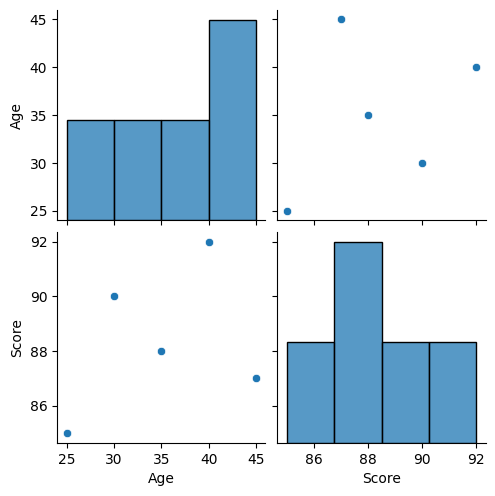

['Age']

In [7]:
plot_features_num_regression(example_df, target_col="Score", columns=["Age"], umbral_corr=0.1, pvalue=0.05)


In [8]:
categorical_features = get_features_cat_regression(example_df, target_col="Score", pvalue=0.05)
print(categorical_features)


[]


In [9]:
plot_features_cat_regression(example_df, target_col="Score", columns=["City", "Gender"], pvalue=0.05, with_individual_plot=True)


No hay columnas que cumplan con los criterios dados.


In [10]:
from scipy.stats import f_oneway

# Für die Spalte "City"
groups_city = [example_df["Score"][example_df["City"] == value] for value in example_df["City"].unique()]
stat_city, pval_city = f_oneway(*groups_city)
print(f"City: p-Wert = {pval_city}")

# Für die Spalte "Gender"
groups_gender = [example_df["Score"][example_df["Gender"] == value] for value in example_df["Gender"].unique()]
stat_gender, pval_gender = f_oneway(*groups_gender)
print(f"Gender: p-Wert = {pval_gender}")


City: p-Wert = 0.3082191780821917
Gender: p-Wert = 0.7436662905658693


# Resumen de Resultados de las Funciones

## **1. describe_df**
### Resultado:
| COL_N   | DATA_TYPE | MISSINGS (%) | UNIQUE_VALUES | CARDIN (%) |
|---------|-----------|--------------|---------------|------------|
| Name    | object    | 0.0          | 4             | 80.0       |
| Age     | int64     | 0.0          | 5             | 100.0      |
| City    | object    | 0.0          | 3             | 60.0       |
| Score   | int64     | 0.0          | 5             | 100.0      |
| Gender  | object    | 0.0          | 2             | 40.0       |

### Interpretación:
El DataFrame no tiene valores faltantes. Las columnas son una mezcla de categóricas (`object`) y numéricas (`int64`).

---

## **2. tipifica_variables**
### Resultado:
| nombre_variable | tipo_sugerido       |
|------------------|---------------------|
| Name            | Numerica Continua   |
| Age             | Numerica Continua   |
| City            | Numerica Continua   |
| Score           | Numerica Continua   |
| Gender          | Binaria             |

### Interpretación:
- `Gender` se clasifica como binaria porque tiene solo 2 valores únicos.
- Las demás columnas se clasifican como continuas debido a su alta cardinalidad relativa.

---

## **3. get_features_num_regression**
### Resultado:
`['Age']`

### Interpretación:
La columna `Age` tiene una correlación estadísticamente significativa con la columna objetivo `Score` (\( p < 0.05 \)).

---

## **4. plot_features_num_regression**
### Resultado:
Se generaron gráficos que muestran la relación entre `Age` y `Score`. Los gráficos ilustran una posible correlación entre estas variables.

---

## **5. get_features_cat_regression**
### Resultado:
`[]`

### Interpretación:
Ninguna columna categórica (`City`, `Gender`) muestra una relación estadísticamente significativa (\( p < 0.05 \)) con la columna objetivo `Score`.

---

## **6. plot_features_cat_regression**
### Resultado:
No hay columnas que cumplan con los criterios dados.

### Interpretación:
No se generaron gráficos porque ninguna columna categórica cumple con los criterios de significancia estadística.

---

## **Conclusiones**
- Las funciones filtraron correctamente las columnas numéricas y categóricas basándose en los criterios establecidos.
- La columna `Age` tiene una relación significativa con `Score`, lo que la hace relevante para el análisis.
- Las columnas categóricas (`City`, `Gender`) no tienen una relación significativa con la columna objetivo `Score`.
